# Numerische Integration

## Arbeitsblatt zur Einarbeitung

Dieses Arbeitsblatt muss vor der Lektion am Donnerstag morgen durchgearbeitet werden. Hier lernst du die numerische Integration. Ziel ist es, das Integral einer analytisch gegebenen Funktion numerisch zu berechnen. Dies werden wir rudimentär implemntieren. Den Fall, dass nur Daten anstatt einer analytischen Funktion gegeben sind und weitere Details besprechen wir im Präsenzunterricht.


## Grundsätzliches Vorgehen


tDas **bestimmte Integral** ist aus dem Modul **Analysis & Algebra** (1. Semester) bekannt. Eine kurze Wiederholung: Das Integral kehrt die Ableitung um, d.h. die Integration dient der Rekonstruktion einer Funktion aus ihrer Ableitung. Das bestimmte Integral $\int_a^b f(x)\,dx$ kann als die gerichtete Fläche zwischen dem Graphen von $f(x)$ und der $x$-Achse im Bereich $x\in[a,b]$ interpretiert werden. Der **Hauptsatz der Differential- und Integralrechnung** lässt uns ein bestimmtes Integral berechnen, wenn wir eine Stammfunktion $F(x)$ des Integranden kennen, also

$$ F'(x) = f(x) \qquad\Rightarrow\qquad \int_a^b f(x)\, dx = F(b) - F(a) $$

Die numerische Integration kommt dann zur Anwedung, wenn

- der Integrand zwar als Funktion gegeben ist, dessen Stammfunktion jedoch nicht analytisch bestimmt werden kann. Beispiele:
  - $ f(x) = \sin(x)\cdot x^{-1} $
  - $ f(x) = \exp\left(-x^2\right) $ (Gauss-Funktion)
- das Integral im Prinzip analytisch integrierbar ist, die analytische Auswertung jedoch unverhältnismässig viel Rechenaufwand erfordert.
- der Integrand nur punktweise gegeben ist, also als Datenreihe $(x_i, f(x_i))$.

### Trapezregel

Eine einfache aber bereits recht gute Näherung des bestimmten Integrals erhält man mit der [Trapezregel](https://de.wikipedia.org/wiki/Trapezregel). Schaue dir eines der Erklärvideos an:

- ["TRAPEZREGEL (Numerischer Integration)" - Mathe Peter](https://www.youtube.com/watch?v=BZbzdsvpc3c)
- ["Näherungsformel zum Trapezverfahren, Numerische Integration" - Daniel Jung](https://www.youtube.com/watch?v=6hqHufW0dD4)


## Arbeitsauftrag


In [13]:
import numpy as np
import scipy
import matplotlib.pyplot as plt


### Aufgabe 1


#### a) Die Trapezregel


Überlege dir ein Grundsätzliches Vorgehen für die Implementation der Trapezregel.


Persönlich fand ich die übersicht vom ersten Video einfacher und Intuitiver. 

#### b) Trapezregel implementieren


Schreibe eine Funktion `trapezregel(func, a, b, n)`, die als Parameter die zu integrierende Funktion `func`, die Integrationsgrenzen `a` und `b` und die Anzahl Trapeze `n` nimmt.


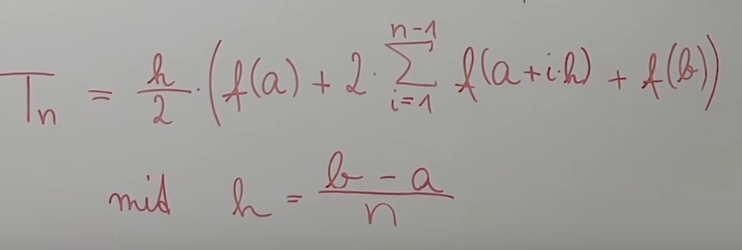

In [14]:
from IPython.display import Image

Image(filename="Bildschirmfoto 2023-04-10 um 20.02.44.png")


In [21]:
def trapezregel(func, a, b, n):
    h = (b - a) / n  # Schrittweite
    
    x = np.linspace(a, b, n + 1)  # x Achse mit n+1 schritten
    
    # Formel für die Trapezregel
    # func(x[1:-1]) = alle Werte von x ausser dem ersten und letzten
    return h / 2 * (func(a) + 2 * np.sum(func(x[1:-1])) + func(b))


#### c) Implementation testen


Berechne das folgende Integral mit deiner Funktion `trapezregel` und `n=4` Trapezen

$$ \int_0^1 e^{x^2} dx $$

Genau dieses Integral wird im [Video vom MathePeter](https://youtu.be/BZbzdsvpc3c) berechnet. Er findet das Resultat $\approx 1.4907$. Du auch?


In [24]:
# Immer als erstes Funktion definieren
def func(x):
    return np.exp(x**2)

In [25]:
trapezregel(func, 0, 1, 4)

1.4906788616988553

#### d) Darstellung

1. Stelle $f(x)=\exp(x^2)$ im Bereich $x \in [-1.5, 1.5]$ grafisch dar.
2. Benutze die Funktion [`plt.fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html), um die Fläche zwischen $y=f(x)$ und der $x$-Achse im integrierten Bereich $[0,1]$ einzufärben.
3. Füge die 4 linear verbundenen Punkte hinzu, die bei der Berechnng der Trapezregel mit `n=4` benutzt werden. (Dazu kannst du `plt.plot` und `plt.stem` kombinieren.)


In [ ]:
print(trapezregel(func,-1.5,1.5,4))

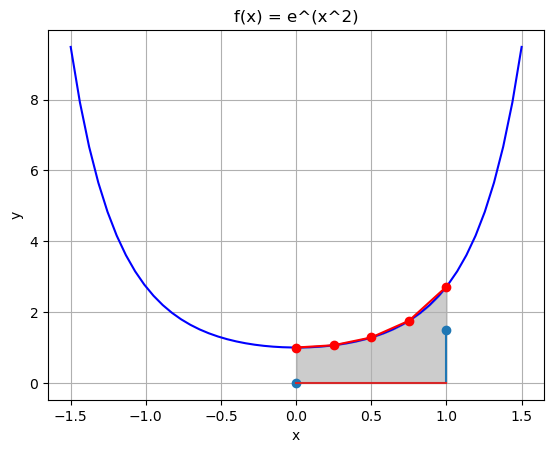

In [70]:
#berechnet die Fläche unter der Kurve
x = np.linspace(-1.5,1.5)
y = func(x)  # y Achse übergibt man die Funktion
plt.plot(x, y,color="blue")

#xint -> integriert 
xint = np.linspace(0,1,100)
# yint übernimmt die Werte der Funktion xint
yint = func(xint)
plt.fill_between(xint, yint, color='black', alpha=0.2)

# Trapezenpunkte 
n = 4
trapez = trapezregel(func,0,1,n)#hier muss man das gewünschte Interval angeben
x_trap = np.linspace(0, 1, n+1) # n+1 weil wir n+1 Punkte brauchen
y_trap = func(x_trap)
plt.plot(x_trap, y_trap, 'ro-')  # Plot der Trapezpunkte

plt.stem([0,1], [0,trapez],) #stem -> Stäbchen dieser Stäbchen werden mit den Trapezpunkten verbunden
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) = e^(x^2)')
plt.grid()
plt.show()

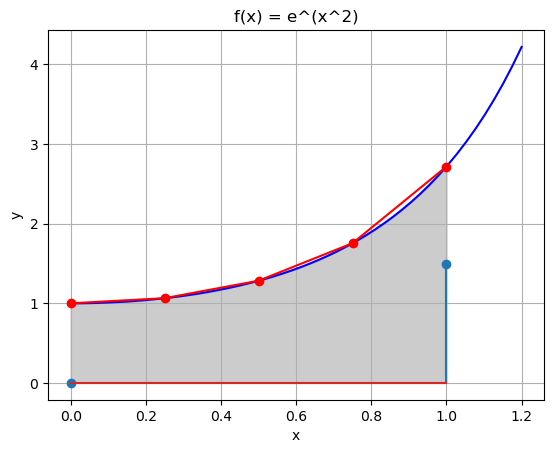

In [75]:
#berechnet die Fläche unter der Kurve
x = np.linspace(0,1.2)
y = func(x)  # y Achse übergibt man die Funktion
plt.plot(x, y,color="blue")

#xint -> integriert 
xint = np.linspace(0,1,100)
# yint übernimmt die Werte der Funktion xint
yint = func(xint)
plt.fill_between(xint, yint, color='black', alpha=0.2)

# Trapezenpunkte 
n = 4
trapez = trapezregel(func,0,1,n)#hier muss man das gewünschte Interval angeben
x_trap = np.linspace(0, 1, n+1) # n+1 weil wir n+1 Punkte brauchen
y_trap = func(x_trap)
plt.plot(x_trap, y_trap, 'ro-')  # Plot der Trapezpunkte

plt.stem([0,1], [0,trapez],) #stem -> Stäbchen dieser Stäbchen werden mit den Trapezpunkten verbunden
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) = e^(x^2)')
plt.grid()
plt.show()

Dieser Code plottet die Funktion $f(x) = e^{x^2}$ im Intervall $[-1.5, 1.5]$, färbt die Fläche unter der Kurve zwischen $x=0$ und $x=1$ ein und zeigt die 4 Punkte, die bei der Berechnung der Trapezregel für dieses Integral verwendet werden. Die Funktion trapezregel wird verwendet, um das Integral numerisch zu berechnen und die berechnete Fläche wird mit den Trapezpunkten verglichen.

### Aufgabe 2


#### a) Benutzen von SciPy


Das Modul [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html) stellt Funktionen fürs Integrieren bereit. Wir benutzen [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) für die Integration von Funktionen.

Überprüfe die Lösung deiner selbstgeschriebenen Funktion mit verschiedenen `n`-Werten, indem du das Ergebnis mit `scipy.integrate.quad` vergleichst. Benutze auch [Wolfram|Alpha](https://www.wolframalpha.com/), um einen weiteren Vergleichswert zu berechnen.

Wolfram Alpha: [Lösung](https://www.wolframalpha.com/input/?i=integrate+e%5Ex%5E2+from+0+to+1) 1.46265


In [117]:
trapez_res = trapezregel(func,0,1,5)
quad_res = scipy.integrate.quad(func,0,1)
print(trapez,quad_res)


1.4906788616988553 (1.4626517459071815, 1.623869645314337e-14)


**Der zweite Wert im Tuple ist der absolute fehler [abserr:`float`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)**

In [114]:

for n in [2, 4, 8, 16]:
    trapez_res = trapezregel(func, 0, 1, n)
    quad_result, quad_err = scipy.integrate.quad(func, 0,1)
    print(f"n={n}, eigene Funktion: {trapez_res}, scipy.integrate.quad: {quad_result}") 
    #:.4f steht für die Dezimalzahlen


n=2, eigene Funktion: 1.571583165458632, scipy.integrate.quad: 1.4626517459071815
n=4, eigene Funktion: 1.4906788616988553, scipy.integrate.quad: 1.4626517459071815
n=8, eigene Funktion: 1.4697122764296655, scipy.integrate.quad: 1.4626517459071815
n=16, eigene Funktion: 1.464420310149482, scipy.integrate.quad: 1.4626517459071815


quad_err steht für den Absolutfehler der numerischen Integration, der von der Funktion quad von scipy.integrate zurückgegeben wird. Dieser Fehler gibt eine Schätzung dafür, wie weit das numerisch berechnete Integral vom exakten Integral entfernt ist.

#### b) Fehleranalyse


Berechne den absoluten Fehler in Abhängigkeit von $n$, also die Differenz zwischen der selbst implementierten Trapezregel und `scipy.integrate.quad`.

Der absolute Fehler soll positiv sein, wenn das Resultat von `trapezregel` grösser ist als das von SciPy. Stelle den Fehler grafisch dar und schaue dir an, was passiert, wenn du $n$ änderst.

- Plote den Fehler in Abhängigkeit von $n$. Wähle $n \in \{1, 2, 3, \ldots , 100\} $
- Benutze [plt.semilogy](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogy.html), um die y-Achse logarithmisch zu skalieren.

In [125]:
n = np.arange(1,101)
n

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])